🔹 First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

Training samples: 120, Testing samples: 30

✅ Model trained successfully with k = 5

🎯 Model Evaluation:
Accuracy: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00   

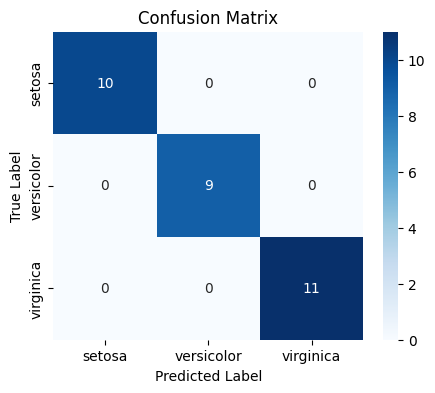

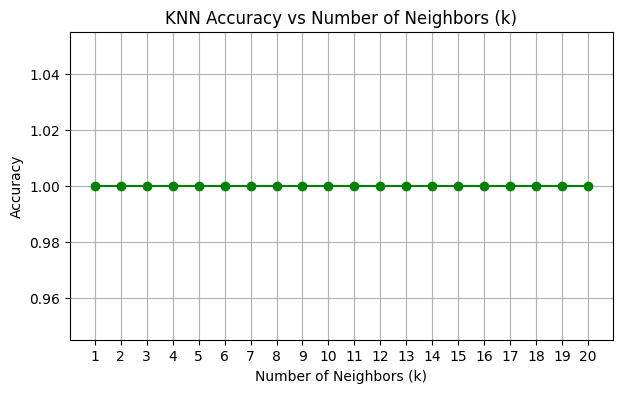

🏆 Best k value: 1 with Accuracy = 1.00


In [1]:
# ==============================================
# 🧠 K-Nearest Neighbors (KNN) Classification
# Dataset: Iris (from sklearn)
# ==============================================

# STEP 1: Import all required libraries
# -------------------------------------
# numpy and pandas are used for data manipulation
# matplotlib and seaborn are used for data visualization
# sklearn provides datasets, preprocessing, model training, and evaluation tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris                     # to load the sample Iris dataset
from sklearn.model_selection import train_test_split        # to split the data into train/test sets
from sklearn.preprocessing import StandardScaler            # to scale features
from sklearn.neighbors import KNeighborsClassifier          # KNN algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # evaluation metrics



# STEP 2: Load the dataset
# -------------------------------------
# The Iris dataset contains 150 samples of flowers, with 4 numeric features
# (sepal length, sepal width, petal length, petal width)
# and a target (species: 0 = Setosa, 1 = Versicolor, 2 = Virginica)

iris = load_iris()           # load dataset
X = iris.data                # feature matrix
y = iris.target              # target vector (species labels)

# Convert to a pandas DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y             # add target column

# Display the first few rows of the dataset
print("🔹 First five rows of the dataset:")
print(df.head(), "\n")


# STEP 3: Split the dataset into Training and Testing sets
# -------------------------------------
# We use 80% of the data for training and 20% for testing
# random_state ensures reproducibility (same random split each time)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}\n")


# STEP 4: Standardize (scale) the features
# -------------------------------------
# KNN is distance-based, so all features should be on the same scale.
# StandardScaler transforms features so they have mean=0 and std=1.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train data, transform it
X_test_scaled = scaler.transform(X_test)        # use same scaler on test data

# STEP 5: Train the KNN model
# -------------------------------------
# n_neighbors defines how many nearest neighbors to consider (k value)
# We start with k=5 (a common default)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)  # train the KNN model on the scaled training data

print(f"✅ Model trained successfully with k = {k}\n")


# STEP 6: Make predictions and evaluate performance
# -------------------------------------
# Use the trained model to predict labels for test data
# Then evaluate accuracy and print detailed classification metrics

y_pred = knn.predict(X_test_scaled)

# Accuracy: overall correctness of the model
print("🎯 Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Classification report: precision, recall, F1-score for each class
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix: shows where predictions were right/wrong
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# STEP 7: Tune the value of k (number of neighbors)
# -------------------------------------
# Different k values may yield different accuracies.
# We can check which k gives the best performance.

accuracy_scores = []      # list to store accuracy for each k
k_values = range(1, 21)   # test k values from 1 to 20

# Loop through each k, train model, and record accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(acc)

# Plot accuracy vs. k
plt.figure(figsize=(7, 4))
plt.plot(k_values, accuracy_scores, marker='o', color='green')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# STEP 8: Identify best k
# -------------------------------------
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"🏆 Best k value: {best_k} with Accuracy = {best_accuracy:.2f}")